In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
X1=[]
for num in range (1,101):
  X1.append(((num+num)-1)/100)

In [0]:
X1

In [0]:
X2=X1[::-1]

In [0]:
X2

In [0]:
data = np.column_stack((X1, X2))

In [0]:
data

In [0]:
target = [(x1*x2)/5 for x1,x2 in zip(X1,X2)]

In [0]:
target


In [0]:
data = np.array(data,dtype=float)
target = np.array(target,dtype=float)

In [12]:
data = np.array(data).reshape(100, 2,1)
data.shape

(100, 2, 1)

In [13]:
target.shape

(100,)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=4)

In [15]:
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(2,1)))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
print(model.summary())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2, 200)            161600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 100)            120400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 50)             30200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 1)            

In [28]:
history = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/500
80/80 [==============================] - 0s 1ms/step - loss: 1.1185e-07 - val_loss: 4.9597e-07
Epoch 2/500
80/80 [==============================] - 0s 1ms/step - loss: 4.1472e-07 - val_loss: 1.0416e-07
Epoch 3/500
80/80 [==============================] - 0s 1ms/step - loss: 3.3158e-07 - val_loss: 2.1552e-07
Epoch 4/500
80/80 [==============================] - 0s 1ms/step - loss: 9.6231e-08 - val_loss: 4.8827e-07
Epoch 5/500
80/80 [==============================] - 0s 1ms/step - loss: 4.0160e-07 - val_loss: 9.4448e-07
Epoch 6/500
80/80 [==============================] - 0s 1ms/step - loss: 1.5509e-06 - val_loss: 2.4630e-07
Epoch 7/500
80/80 [==============================] - 0s 1ms/step - loss: 3.3879e-07 - val_loss: 3.9726e-07
Epoch 8/500
80/80 [==============================] - 0s 1ms/step - loss: 2.5950e-07 - val_loss: 2.7494e-07
Epoch 9/500
80/80 [==============================] - 0s 997us/step - loss: 1.4778e-07 - val_loss: 9.

In [0]:
results = model.predict(x_test)

In [30]:
results.shape

(20, 1)

In [31]:
y_test.shape

(20,)

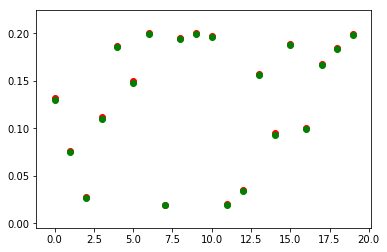

In [32]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.show()

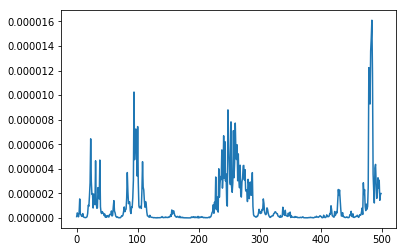

In [33]:
plt.plot(history.history['loss'])
plt.show()